In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
import math
from datetime import datetime

In [53]:
# a function to read in the data and clean up the attendance rate column 
def read_attendance_data(attendance_file_name):
    attendance_df = pd.read_csv(attendance_file_name)
    attendance_df['Attendance Rate'].convert_dtypes(convert_string=True)
    rate = []
    for ia in range(len(attendance_df)):
        result = attendance_df['Attendance Rate'][ia]
        newresult = float(result.replace('%',''))
        rate.append(newresult)
    attendance_df['Attendance Rate'] = rate
    return attendance_df

In [54]:
# open the attendance rate data and write it into a DataFrame 
attendance_file_name = "..\data\QLD-2015-19-student-attendance-rate-by-school.csv"
attendance_df = read_attendance_data(attendance_file_name)
attendance_df.head(10)

,School Code,School,Attendance Year,School Type,School Category,Remoteness Area,Region,Local Government Area,State Electorate,FTE Days Attended,Possible Attendance Days,Attendance Rate
0,591,Abercorn State School,2015,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1987.5,2103.0,94.5
1,591,Abercorn State School,2016,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1632.5,1705.0,95.7
2,591,Abercorn State School,2017,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1405.0,1440.0,97.6
3,591,Abercorn State School,2018,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1640.0,1700.0,96.5
4,591,Abercorn State School,2019,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1657.5,1728.0,95.9
5,1275,Abergowrie State School,2015,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,1007.0,1067.0,94.4
6,1275,Abergowrie State School,2016,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,420.5,484.0,86.9
7,1275,Abergowrie State School,2017,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,371.5,384.0,96.7
8,1275,Abergowrie State School,2018,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,614.0,679.0,90.4
9,1275,Abergowrie State School,2019,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,596.0,652.0,91.4


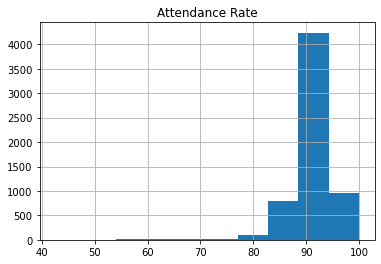

In [55]:

attendance_df.hist(column='Attendance Rate',bins=10);
